In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [116]:
df =pd.read_csv("data/stud.csv")

In [117]:
x =df.drop(columns='math_score',axis =1)
y= df['math_score']

In [118]:
num_features =x.select_dtypes(exclude='object').columns
cat_features =x.select_dtypes(include='object').columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
oh_transformer = OneHotEncoder()
num_transformer =StandardScaler()

preprocessor = ColumnTransformer(

    [('OneHotEncoder',oh_transformer,cat_features),
     ('standardscaler', num_transformer,num_features)
    ]
)

In [119]:
x=preprocessor.fit_transform(x)


In [120]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [121]:
x.shape

(1000, 19)

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.25,random_state=42)

In [123]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse =mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_scr= r2_score(true,predicted)
    return mae,rmse,r2_scr

In [124]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [125]:
model_list=[]
r2_list=[]

In [126]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...), <catboost.core.CatBoostRegressor object at 0x0000021C5FD3EEA0>, AdaBoostRegressor()])

In [127]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred =model.predict(x_test)
     
    model_train_mae,model_train_rmse,model_train_r2= evaluate_model(y_train,y_train_pred)  
    model_test_mae,model_test_rmse,model_test_r2= evaluate_model(y_test,y_test_pred) 

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training dataset')
    print('mean_absolute_error: {:.4f}'.format(model_train_mae))
    print('root mean squared error: {:.4f}'.format(model_train_rmse))
    print('r2_score: {:.4f}'.format(model_train_r2))
    print('\n')
    print('---------------------------------------')
    print('\n')
    print('model performance for test dataset')
    print('mean_absolute_error: {:.4f}'.format(model_test_mae))
    print('root mean squared error: {:.4f}'.format(model_test_rmse))
    print('r2_score: {:.4f} '.format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


LinearRegression
model performance for training dataset
mean_absolute_error: 4.2383
root mean squared error: 5.2972
r2_score: 0.8743


---------------------------------------


model performance for test dataset
mean_absolute_error: 4.3379
root mean squared error: 5.4825
r2_score: 0.8778 


Lasso
model performance for training dataset
mean_absolute_error: 5.1837
root mean squared error: 6.5515
r2_score: 0.8077


---------------------------------------


model performance for test dataset
mean_absolute_error: 5.2217
root mean squared error: 6.6541
r2_score: 0.8200 


Ridge
model performance for training dataset
mean_absolute_error: 4.2368
root mean squared error: 5.2976
r2_score: 0.8743


---------------------------------------


model performance for test dataset
mean_absolute_error: 4.3354
root mean squared error: 5.4788
r2_score: 0.8780 


K-Neighbors Regressor
model performance for training dataset
mean_absolute_error: 4.5864
root mean squared error: 5.7920
r2_score: 0.8497


------

In [128]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_name','r2-score']).sort_values( by =['r2-score'],ascending=False)

,model_name,r2-score
2,Ridge,0.877990
0,LinearRegression,0.877824
7,CatBoosting Regressor,0.854830
5,Random Forest Regressor,0.849985
6,XGBRegressor,0.836290
8,AdaBoost Regressor,0.834867
1,Lasso,0.820027
3,K-Neighbors Regressor,0.793207
4,Decision Tree,0.756332


In [132]:
lin_model = LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred =lin_model.predict(x_test)
r2 = r2_score(y_test,y_pred)*100
print(f'accuracy: {r2}')



accuracy: 87.78243107659013


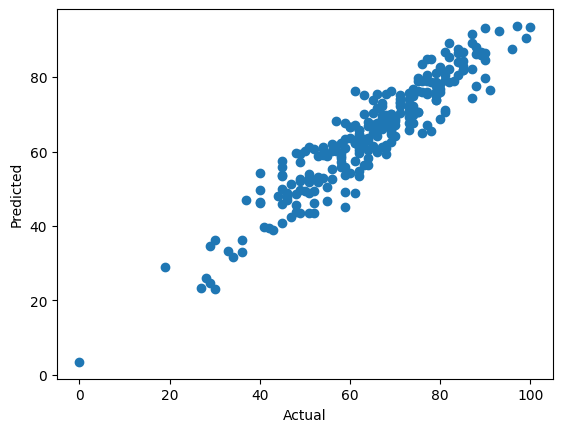

In [135]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


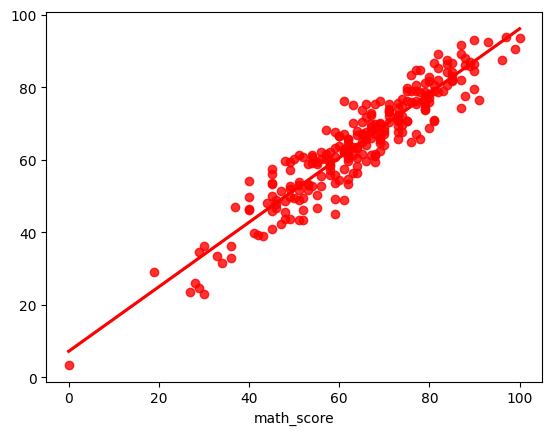

In [136]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [137]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626
